In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Feature Selection

In [4]:
df.shape

(8693, 14)

In [5]:
# Data Cleaning

df = df.dropna()


In [6]:
true_df = df.loc[df['Transported'] == True]
true_df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


Distribution of HomePlanet and Destination

Text(0.5, 1.0, 'Distribution of Home Planets')

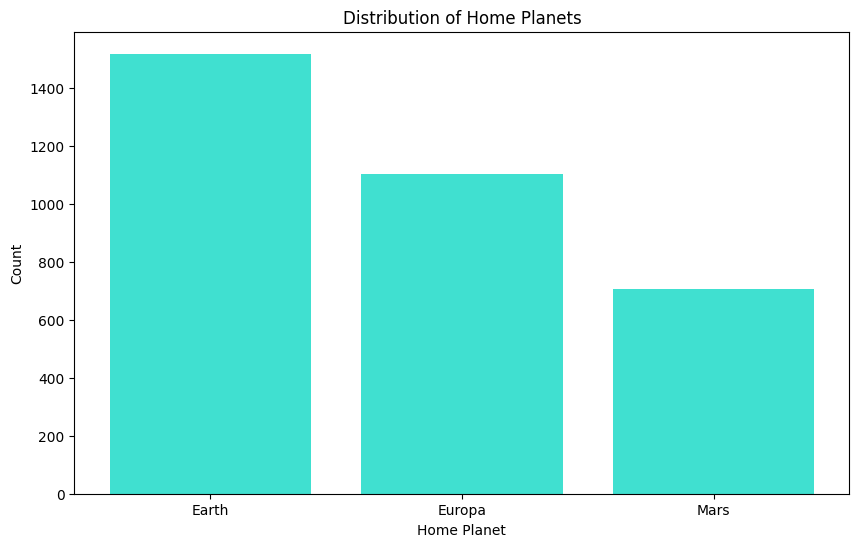

In [7]:
home_planets = true_df['HomePlanet'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(home_planets.index, home_planets.values, color='turquoise')
ax.set_xlabel('Home Planet')
ax.set_ylabel('Count')
ax.set_title('Distribution of Home Planets')


Earth is the highest

Text(0.5, 1.0, 'Distribution of Destination Planets')

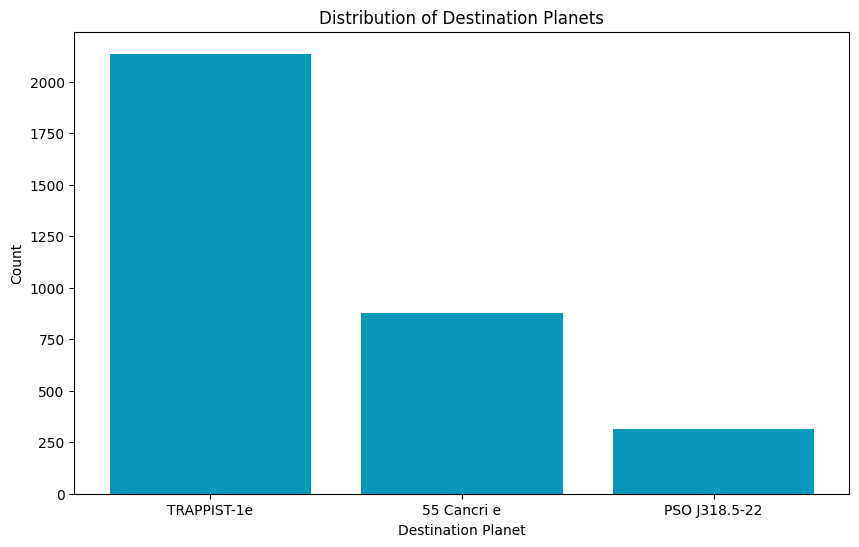

In [8]:
home_planets = true_df['Destination'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(home_planets.index, home_planets.values, color='#0898be')
ax.set_xlabel('Destination Planet')
ax.set_ylabel('Count')
ax.set_title('Distribution of Destination Planets')


In [9]:
true_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True


#### Investigating the following features: 

 - Home planet
 - Destination
 - Cryo Sleep
 - Cabin
 - Age
 - Room Service 
 - 

Text(0.5, 1.0, 'How many people in each cabin section')

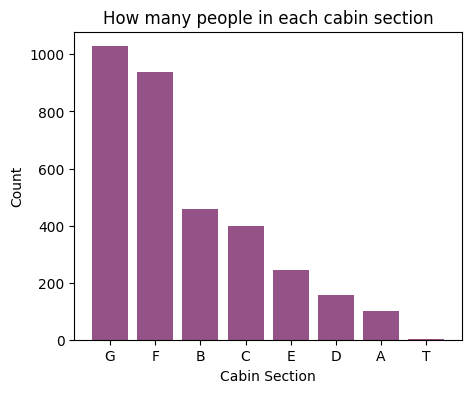

In [10]:
# Cabin

cabin_section = true_df['Cabin'].str[0]
cabin_section = cabin_section.value_counts()

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(cabin_section.index, cabin_section.values, color='#955286')
ax.set_xlabel('Cabin Section')
ax.set_ylabel('Count')
ax.set_title('How many people in each cabin section')

Text(0.5, 0, 'Age')

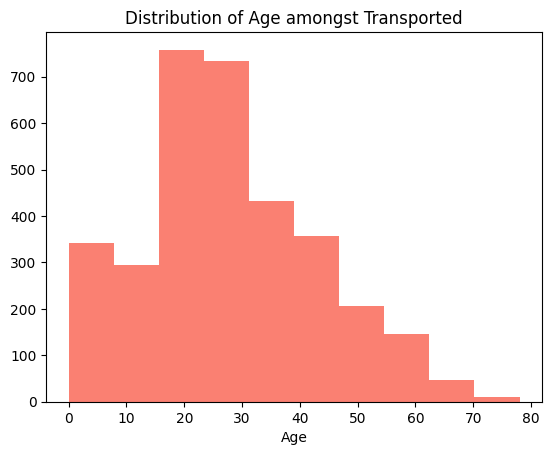

In [11]:
# Age

plt.hist(true_df['Age'], color='Salmon')
plt.title('Distribution of Age amongst Transported')
plt.xlabel('Age')

Text(0.5, 1.0, 'Checking if Dataset is balanced')

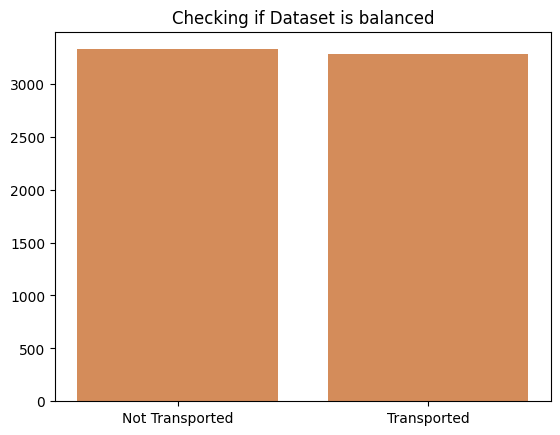

In [12]:
# Room Service

true_false = df['Transported'].value_counts()
Categories = ['Not Transported', 'Transported']

plt.bar(Categories, true_false.values, color='#d48c5a')
plt.title('Checking if Dataset is balanced')

### Feature Engineering

In [30]:
# Balanced enough,so feature selection

""" - Home planet
 - Destination
 - Cryo Sleep
 - Cabin
 - Age
"""

df['cabin_section'] = df['Cabin'].str[0]
# encoding planets and cabin section to integer categories
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['HomePlanet'] = encoder.fit_transform(df['HomePlanet'])

df['cabin_section'] = encoder.fit_transform(df['cabin_section'])

df['Destination'] = encoder.fit_transform(df['Destination'])



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#
X = df[['CryoSleep', 'HomePlanet', 'Destination', 'cabin_section', 'Age']]
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



C:\Users\chchr\AppData\Local\Temp\ipykernel_4816\621486229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cabin_section'] = df['Cabin'].str[0]
C:\Users\chchr\AppData\Local\Temp\ipykernel_4816\621486229.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomePlanet'] = encoder.fit_transform(df['HomePlanet'])
C:\Users\chchr\AppData\Local\Temp\ipykernel_4816\621486229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [37]:

model = RandomForestClassifier(n_estimators=400, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, prediction))
print(f'{accuracy_score(y_test, prediction)}')

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.84      0.76       653
        True       0.81      0.64      0.72       669

    accuracy                           0.74      1322
   macro avg       0.75      0.74      0.74      1322
weighted avg       0.75      0.74      0.74      1322

0.7413010590015129


In [33]:
test_dataset = pd.read_csv('test.csv')
test_dataset['cabin_section'] = test_dataset['Cabin'].str[0]
# encoding planets and cabin section to integer categories
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
test_dataset['HomePlanet'] = encoder.fit_transform(test_dataset['HomePlanet'])

test_dataset['cabin_section'] = encoder.fit_transform(test_dataset['cabin_section'])

test_dataset['Destination'] = encoder.fit_transform(test_dataset['Destination'])

X = test_dataset[['CryoSleep', 'HomePlanet', 'Destination', 'cabin_section', 'Age']]
prediction_test = model.predict(X)

print(prediction_test)

[ True False  True ...  True False False]
